Covariance matrix has been calculated! Its shape is: (947L, 947L)
passed 1
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


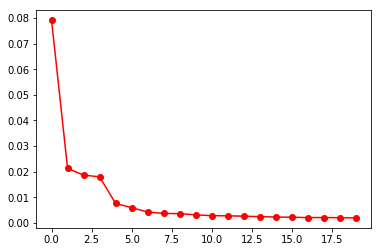

In [67]:
import numpy as np
from numpy.linalg import norm
import pandas as pd
from pandas import DataFrame
import pylab as pl
"""
data.dat is identically the missing.dat uploaded by the professor.
The only difference is I delete the first row and last row manually.
"""
df = pd.read_table("data.dat",sep=" ",header=None)
df = df.fillna(method='ffill',axis=1)
data = np.array( df.drop(504, 1) )
returns = ((data[:,1:504]-data[:,0:503])/data[:,0:503]).transpose()
df=DataFrame(returns)
cov=np.array(df.cov())
print "Covariance matrix has been calculated! Its shape is:",cov.shape


"""The identical function of Question 01"""
def findMaxEigen(cov,eps=0.01,negative_eigen=False):
    if negative_eigen==False:
        LL=cov.shape[0]
        vector=np.random.rand(LL)
        vector=vector.reshape(LL,1)
        vector=vector/norm(vector)
        while(True):
            tempv=np.matmul(cov,vector)
            tempv=tempv/norm(tempv)
            if norm(tempv-vector)<eps:
                vector=tempv
                break
            vector=tempv
        tempv=np.matmul(cov,vector)
        eigenvalue=norm(tempv)/norm(vector)
        return eigenvalue,vector
    else:
        LL=cov.shape[0]
        vector=np.random.rand(LL)
        vector=vector.reshape(LL,1)
        vector=vector/norm(vector)
        mark=+1
        while(True):
            tempv=np.matmul(cov,vector)
            tempv=tempv/norm(tempv)
            if norm(tempv-vector)<eps:
                vector=tempv
                break
            if norm(tempv+vector)<eps:
                vector=tempv
                mark=-1
                break
            vector=tempv
        tempv=np.matmul(cov,vector)
        eigenvalue=mark*norm(tempv)/norm(vector)
        return eigenvalue,vector

mcov=np.copy(cov) # the matrix that we will manipulate
evalue=[]         # To store the eigenvalues
evector=[]        # To store the eigenvectors

count=0
"""
The following loop can calculated at most 500 eigenvalues. Afterwards the iteration in findMaxEigen will not end.
I believe it is because of the errors using power method. The eigenvalue is too small to be confused with the errors.
"""
print "passed 1"
while True:
    value,vector=findMaxEigen(mcov)
    count+=1
    print count
    """
    Required by the project, the break condition should be Nth evalue< epsilon * Max evalue.
    Since we can calculated enough spectrum as we want, it is not necessary.We can calculated the first 500 spectrum and then select
    the first several that meet the condition.
    """
    if count==100:
        break
    evalue.append(value)
    evector.append(vector)
    mcov = mcov - value * np.matmul(vector,vector.transpose())

YY=evalue[:20]
pl.plot(range(len(YY)),YY,"ro-")
pl.show()